In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Epoch 1/1000


c:\Users\souza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 1s - 315ms/step - loss: 2.1645 - val_loss: 1.9212
Epoch 2/1000
2/2 - 0s - 26ms/step - loss: 2.1060 - val_loss: 1.8690
Epoch 3/1000
2/2 - 0s - 27ms/step - loss: 2.0489 - val_loss: 1.8183
Epoch 4/1000
2/2 - 0s - 26ms/step - loss: 1.9936 - val_loss: 1.7686
Epoch 5/1000
2/2 - 0s - 25ms/step - loss: 1.9408 - val_loss: 1.7208
Epoch 6/1000
2/2 - 0s - 27ms/step - loss: 1.8855 - val_loss: 1.6751
Epoch 7/1000
2/2 - 0s - 26ms/step - loss: 1.8348 - val_loss: 1.6313
Epoch 8/1000
2/2 - 0s - 26ms/step - loss: 1.7834 - val_loss: 1.5879
Epoch 9/1000
2/2 - 0s - 26ms/step - loss: 1.7331 - val_loss: 1.5441
Epoch 10/1000
2/2 - 0s - 25ms/step - loss: 1.6827 - val_loss: 1.4999
Epoch 11/1000
2/2 - 0s - 25ms/step - loss: 1.6323 - val_loss: 1.4552
Epoch 12/1000
2/2 - 0s - 31ms/step - loss: 1.5843 - val_loss: 1.4112
Epoch 13/1000
2/2 - 0s - 30ms/step - loss: 1.5361 - val_loss: 1.3667
Epoch 14/1000
2/2 - 0s - 44ms/step - loss: 1.4880 - val_loss: 1.3231
Epoch 15/1000
2/2 - 0s - 26ms/step - loss: 1.4424 - val

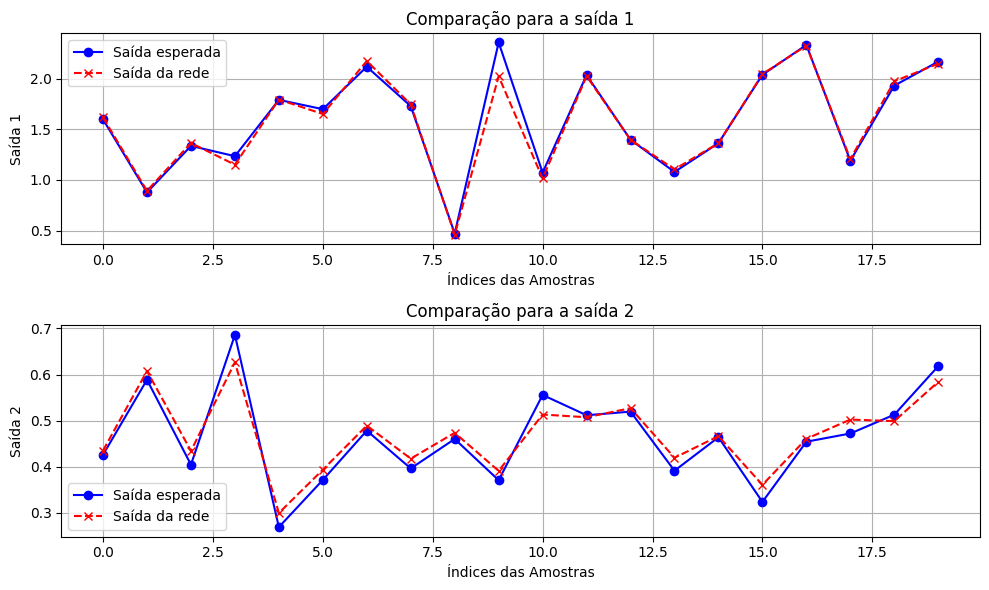

In [26]:
# Gerar dados de entrada (5 variáveis)
num_samples = 100
X = np.random.rand(num_samples, 20)  # Dados de entrada aleatórios no intervalo [0, 1]

# Gerar dados de saída (2 variáveis)
Y = np.column_stack((np.sum(X[:, :3], axis=1), np.mean(X[:, 3:], axis=1)))

# Dividir dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar e configurar o modelo
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))  # Camada oculta com 10 neurônios
model.add(Dense(Y.shape[1], activation='linear'))  # Camada de saída com 2 neurônios

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a perda no conjunto de validação
    patience=10,         # Número de épocas sem melhora antes de parar
    restore_best_weights=True  # Restaura os pesos da melhor época
)

# Treinar o modelo com Early Stopping
history = model.fit(
    X_train, Y_train,
    epochs=1000, 
    verbose=2, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Testar o modelo
Y_pred = model.predict(X_test)

# Avaliar desempenho
mse_error = mean_squared_error(Y_test, Y_pred)
print(f"Erro médio quadrático (MSE) no conjunto de teste: {mse_error:.4f}")

# Plotar resultados
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(Y_test[:, i], 'b-o', label='Saída esperada')
    plt.plot(Y_pred[:, i], 'r--x', label='Saída da rede')
    plt.xlabel('Índices das Amostras')
    plt.ylabel(f'Saída {i+1}')
    plt.legend()
    plt.grid(True)
    plt.title(f'Comparação para a saída {i+1}')
plt.tight_layout()
plt.show()


In [28]:
import tensorflow as tf

# Verificar dispositivos disponíveis
print("Dispositivos disponíveis:")
for device in tf.config.list_physical_devices():
    print(device)

# Verificar se a GPU está ativa
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("\nTensorFlow está utilizando GPU.")
else:
    print("\nTensorFlow não encontrou uma GPU ativa.")


Dispositivos disponíveis:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

TensorFlow não encontrou uma GPU ativa.
